In [8]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [9]:
data_dir = 'C:/Users/Thomas Elston/Documents/PYTHON/NHP_DEgap/human replication/csv_files'

In [10]:
# functions

def accumulate_data(data_dir):

    # get names+paths of .csv files
    fnames = glob.glob(os.path.join(data_dir, '*.csv'))

    # initialize a dataframe for ALL of the data
    alldata = pd.DataFrame()

    for f in fnames:
        f_data = pd.read_csv(f, header=[0])

        alldata = pd.concat([alldata, f_data])

    # Drop all unnamed columns
    unnamed_columns = [col for col in alldata.columns if col.startswith('Unnamed')]

    alldata = alldata.drop(columns=unnamed_columns)
    alldata = alldata.reset_index(drop=True)

    return alldata

def calculate_mean_sem(indata):

    data_mean = np.nanmean(indata, axis=0)
    data_sem = np.nanstd(indata, axis= 0) / (np.sqrt(len(indata)))

    return data_mean, data_sem

In [11]:
# load in the data
bhv = accumulate_data(data_dir)

In [12]:
# create indices for each of the trial types
train_d_ix = bhv['task_phase'] == 1
train_e_ix = bhv['task_phase'] == 2

pure_d_ix = (bhv['task_phase'] == 3) & (bhv['trial_type'] == 1)
pure_e_ix = (bhv['task_phase'] == 3) & (bhv['trial_type'] == 2)
ue_d_ix = bhv['trial_type'] == 3
ue_e_ix = bhv['trial_type'] == 4
eq_ix = bhv['trial_type'] == 5

eq20_ix = (bhv['left_prob'] == 20) & eq_ix
eq50_ix = (bhv['left_prob'] == 50) & eq_ix
eq80_ix = (bhv['left_prob'] == 80) & eq_ix

# extract the dependent measures
picked_exp = (bhv['chosen_type'] == 2).to_numpy().astype(int)
picked_best = (bhv['picked_best'] == 1).to_numpy().astype(int)
rt = (bhv['rt']).to_numpy().astype(int)

In [13]:
# compute means of all conditions
train_d_mean, train_d_sem = calculate_mean_sem(picked_best[train_d_ix])
train_e_mean, train_e_sem = calculate_mean_sem(picked_best[train_e_ix])

pure_d_mean, pure_d_sem = calculate_mean_sem(picked_best[pure_d_ix])
pure_e_mean, pure_e_sem = calculate_mean_sem(picked_best[pure_e_ix])

ue_d_mean, ue_d_sem = calculate_mean_sem(picked_best[ue_d_ix])
ue_e_mean, ue_e_sem = calculate_mean_sem(picked_best[ue_e_ix])

eq20_mean, eq20_sem = calculate_mean_sem(picked_exp[eq20_ix])
eq50_mean, eq50_sem = calculate_mean_sem(picked_exp[eq50_ix])
eq80_mean, eq80_sem = calculate_mean_sem(picked_exp[eq80_ix])

Text(0.5, 0, 'EQ Condition')

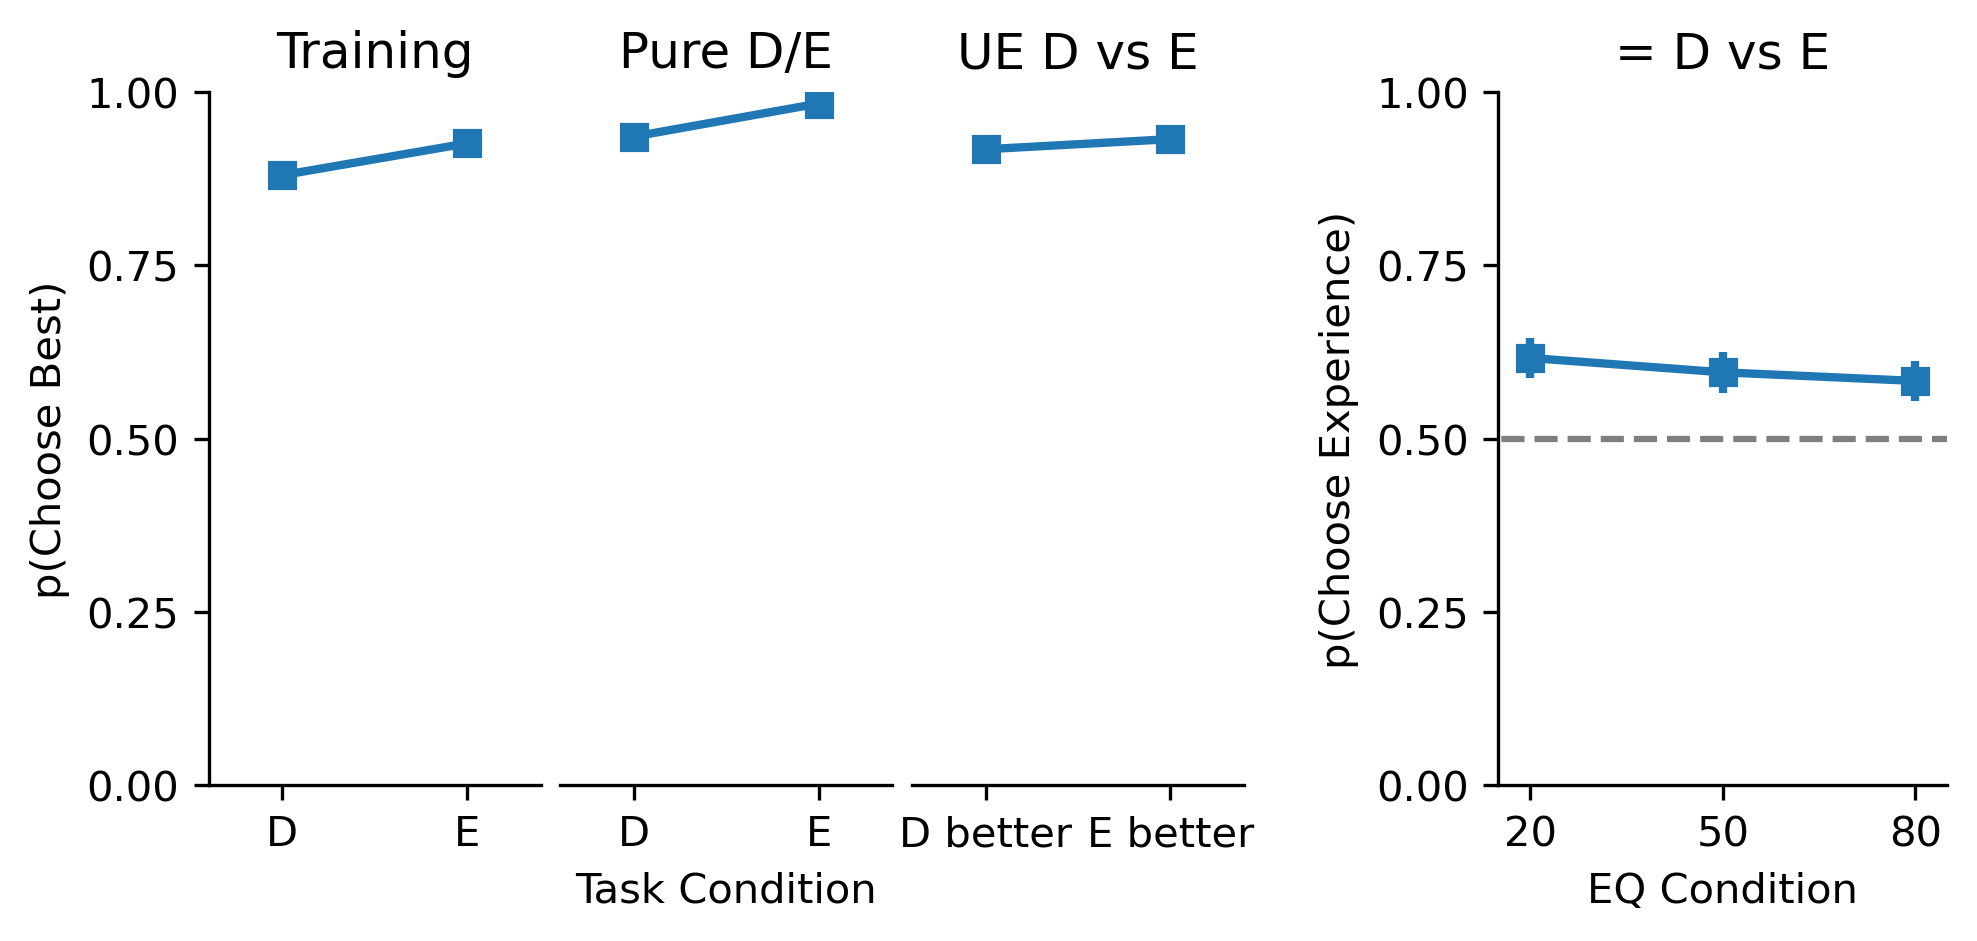

In [14]:
# plot
fig = plt.figure(figsize=(10, 3), dpi=300)
gs = fig.add_gridspec(1, 20)

# create axes
train_ax = fig.add_subplot(gs[0, 0: 3])
pure_ax = fig.add_subplot(gs[0, 3: 6])
ue_ax = fig.add_subplot(gs[0, 6: 9])
eq_ax = fig.add_subplot(gs[0, 11: 15])

# now plot
train_ax.errorbar([1,2], np.array([train_d_mean, train_e_mean]), 
                  np.array([train_d_sem, train_e_sem]), marker='s', linewidth=2)

train_ax.set_xticks([1, 2])
train_ax.set_xticklabels(['D', 'E'])
train_ax.set_ylim((0,1))
train_ax.set_xlim((.6, 2.4))
train_ax.spines['right'].set_visible(False)
train_ax.spines['top'].set_visible(False)
train_ax.set_yticks((0, .25, .5, .75, 1))
train_ax.set_title('Training')
train_ax.set_ylabel('p(Choose Best)')


pure_ax.errorbar([1,2], np.array([pure_d_mean, pure_e_mean]), 
                  np.array([pure_d_sem, pure_e_sem]), marker='s', linewidth=2)

pure_ax.set_xticks([1, 2])
pure_ax.set_xticklabels(['D', 'E'])
pure_ax.set_ylim((0,1))
pure_ax.set_xlim((.6, 2.4))
pure_ax.spines['right'].set_visible(False)
pure_ax.spines['top'].set_visible(False)
pure_ax.spines['left'].set_visible(False)
pure_ax.set_yticks([])
pure_ax.set_title('Pure D/E')
pure_ax.set_xlabel('Task Condition')


ue_ax.errorbar([1,2], np.array([ue_d_mean, ue_e_mean]), 
                  np.array([ue_d_sem, ue_e_sem]), marker='s', linewidth=2)

ue_ax.set_xticks([1, 2])
ue_ax.set_xticklabels(['D better', 'E better'])
ue_ax.set_ylim((0,1))
ue_ax.set_xlim((.6, 2.4))
ue_ax.spines['right'].set_visible(False)
ue_ax.spines['top'].set_visible(False)
ue_ax.spines['left'].set_visible(False)
ue_ax.set_yticks([])
ue_ax.set_title('UE D vs E')



probs = np.array([20, 50, 80])
eq_ax.errorbar(probs, np.array([eq20_mean, eq50_mean, eq80_mean]), 
             np.array([eq20_sem, eq50_sem, eq80_sem]), marker='s', linewidth=2)
eq_ax.plot([0, 100], [.5, .5], linestyle='--', color='tab:gray')
eq_ax.set_ylim((0,1))
eq_ax.set_xticks((20, 50, 80))
eq_ax.set_yticks((0, .25, .5, .75, 1))
eq_ax.set_xlim((15, 85))
eq_ax.spines['right'].set_visible(False)
eq_ax.spines['top'].set_visible(False)
eq_ax.set_ylabel('p(Choose Experience)')
eq_ax.set_title('= D vs E')
eq_ax.set_xlabel('EQ Condition')


